In [2]:
import pickle
from USPTO_CONFIG import USPTO_CONFIG
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [3]:
with open(USPTO_CONFIG.reactant_dict, 'rb') as handle:
    reactant_dict = pickle.load(handle)

with open(USPTO_CONFIG.full_dict, 'rb') as handle:
    full_dict = pickle.load(handle)

In [4]:
print("Number of distinct molecules in reactants:{}\nNumber of distinct molecules in reactants+products:{}".format(len(reactant_dict), len(full_dict)))

Number of distinct molecules in reactants:692559
Number of distinct molecules in reactants+products:1260895


In [5]:
def dict_process(reactant_dict, full_dict):
    reactant_df = pd.DataFrame(data=reactant_dict)
    reactant_df = reactant_df.transpose()

    full_df = pd.DataFrame(data=full_dict)
    full_df = full_df.transpose()

    return reactant_df, full_df

In [6]:
reactant_df, full_df = dict_process(reactant_dict, full_dict)

In [7]:
reactant_df = reactant_df.rename_axis('inchi').reset_index()
full_df = full_df.rename_axis('inchi').reset_index()

In [1]:

plt.hist(reactant_df['count'], bins=40)
plt.title("Reactants appearance frequency distribtuion in USPTO")
plt.show()

plt.hist(reactant_df[reactant_df['count'] < 10]['count'], bins=40)
plt.title("Reactants appearance frequency < 10 distribtuion in USPTO")
plt.show()

plt.hist(reactant_df[(reactant_df['count'] > 10) & (reactant_df['count'] < 100)]['count'], bins=40)
plt.title("Reactants appearance frequency > 10 & < 100 distribtuion in USPTO")
plt.show()

plt.hist(reactant_df[(reactant_df['count'] > 100) & (reactant_df['count'] < 2000)]['count'], bins=40)
plt.title("Reactants appearance frequency > 100 & < 2000 distribtuion in USPTO")
plt.show()

plt.hist(reactant_df[(reactant_df['count'] > 2000) & (reactant_df['count'] < 10000)]['count'], bins=40)
plt.title("Reactants appearance frequency > 2000 & < 10000 distribtuion in USPTO")
plt.show()

plt.hist(reactant_df[reactant_df['count'] > 10000]['count'], bins=40)
plt.title("Reactants appearance frequency > 10000 distribtuion in USPTO")
plt.show()

plt.hist(reactant_df['atoms'], bins=40)
plt.title("Size distribution for reactants molecules in USPTO")
plt.show()

NameError: name 'plt' is not defined

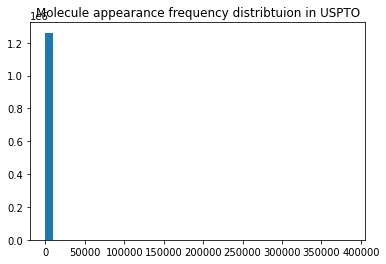

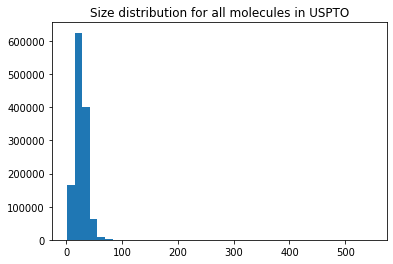

In [9]:

plt.hist(full_df['count'], bins=40)
plt.title("Molecule appearance frequency distribtuion in USPTO")
plt.show()

plt.hist(full_df['atoms'], bins=40)
plt.title("Size distribution for all molecules in USPTO")
plt.show()

In [10]:
reactant_df[['count', 'atoms']].describe()

,count,atoms
count,692559.000000,692559.000000
mean,9.786950,23.445758
std,775.331692,10.144402
min,1.000000,1.000000
25%,1.000000,16.000000
50%,2.000000,22.000000
75%,3.000000,29.000000
max,381370.000000,547.000000


In [11]:
full_df[['count', 'atoms']].describe()

,count,atoms
count,1.260895e+06,1.260895e+06
mean,7.022154e+00,2.567368e+01
std,6.016513e+02,1.007612e+01
min,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.800000e+01
50%,2.000000e+00,2.500000e+01
75%,3.000000e+00,3.200000e+01
max,3.859490e+05,5.470000e+02


In [9]:
reactant_df.to_csv(USPTO_CONFIG.reactant_df, index=False)
full_df.to_csv(USPTO_CONFIG.full_df, index=False)

## Masking Ratio Analysis

In [5]:
with open(USPTO_CONFIG.reaction_centre, 'rb') as handle:
    mask_analysis = pickle.load(handle)

In [6]:
print("Reaction Involved:", len(mask_analysis))
mol_dict = {}
reaction_ratio = []
one_hop_r = []
two_hop_r = []
three_hop_r = []

Reaction Involved: 1107901


In [7]:
for reac_name, mol_list in tqdm(list(mask_analysis.items())):
    for mol_smiles, center in mol_list.items():
        mol = Chem.MolFromSmiles(mol_smiles)
        inchi = Chem.MolToInchi(mol)
        # print(center)
        hash = ''.join([str(i) for i in sorted(center['reaction_centre'])])
        # if hash == "":
        #     print(reac_name,"\n", mol_smiles, "\n")
        #     print(center)
        if inchi in mol_dict:
            mol_dict[inchi].add(hash)
        else:
            mol_dict[inchi] = {hash}

        atom_num = mol.GetNumAtoms()
        reaction_ratio.append(len(center['reaction_centre']) / atom_num)
        one_hop_r.append(len(center['one_hop']) / atom_num)
        two_hop_r.append(len(center['two_hop']) / atom_num)
        three_hop_r.append(len(center['three_hop']) / atom_num)
        

100%|██████████| 1107901/1107901 [11:54<00:00, 1550.19it/s]


In [8]:
reaction_center_uni_count = [len(rcenter) for rcenter in mol_dict.values()]

In [120]:
big_ones = [(inchi, rcenter) for inchi, rcenter in mol_dict.items() if len(rcenter) > 1]

In [121]:
len(big_ones)

89072

In [126]:
big_ones[100]

('InChI=1S/C2H5ClO/c1-4-2-3/h2H2,1H3',
 {'0', '01', '02', '023', '03', '1', '12', '2', '23', '3'})

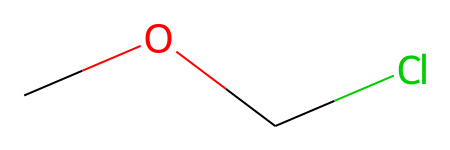

In [127]:
Chem.MolFromInchi(big_ones[100][0])

Unique Reaction Center Count:
                   0
count  676478.000000
mean        1.256039
std         1.325701
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       263.000000


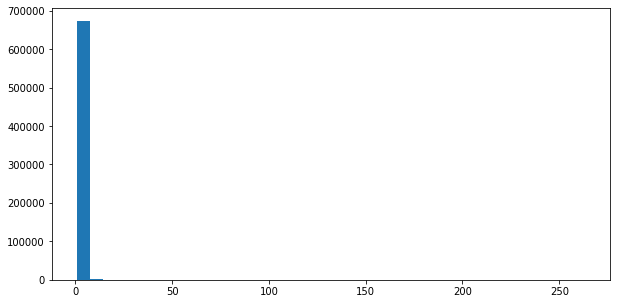

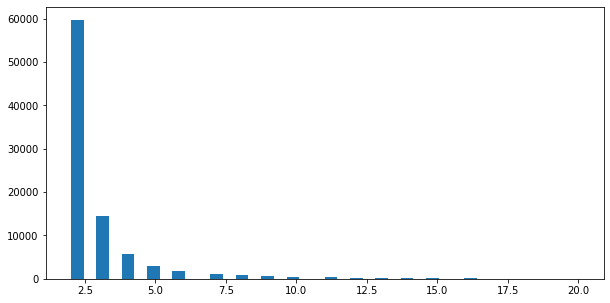

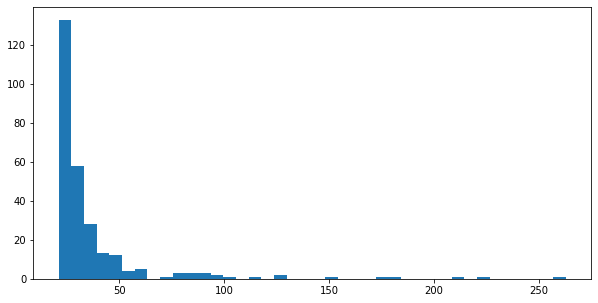

In [12]:
print("Unique Reaction Center Count:")
print(pd.DataFrame(reaction_center_uni_count).describe())
plt.rcParams["figure.figsize"] = (10, 5)
plt.hist(reaction_center_uni_count, bins = 40)
plt.show()

plt.rcParams["figure.figsize"] = (10, 5)
plt.hist([i for i in reaction_center_uni_count if i > 1 and i <= 20], bins = 40)
plt.show()

plt.rcParams["figure.figsize"] = (10, 5)
plt.hist([i for i in reaction_center_uni_count if i > 20], bins = 40)
plt.show()

In [82]:
print("Reaction Center Masking Ratio :")
print(pd.DataFrame(reaction_ratio).describe())


Reaction Center Masking Ratio :
                  0
count  1.910931e+06
mean   1.257218e-01
std    1.403078e-01
min    0.000000e+00
25%    4.761905e-02
50%    8.333333e-02
75%    1.428571e-01
max    1.000000e+00


In [83]:
print("Reaction Center w/ 1-hop neighbours Masking Ratio :")
print(pd.DataFrame(one_hop_r).describe())


Reaction Center w/ 1-hop neighbours Masking Ratio :
                  0
count  1.910931e+06
mean   3.050438e-01
std    2.500344e-01
min    0.000000e+00
25%    1.379310e-01
50%    2.352941e-01
75%    4.000000e-01
max    1.000000e+00


In [84]:
print("Reaction Center w/ 2-hop neighbours Masking Ratio :")
print(pd.DataFrame(two_hop_r).describe())

Reaction Center w/ 2-hop neighbours Masking Ratio :
                  0
count  1.910931e+06
mean   4.576759e-01
std    2.980482e-01
min    0.000000e+00
25%    2.380952e-01
50%    4.000000e-01
75%    6.551724e-01
max    1.000000e+00


In [85]:
print("Reaction Center w/ 3-hop neighbours Masking Ratio :")
print(pd.DataFrame(three_hop_r).describe())


Reaction Center w/ 3-hop neighbours Masking Ratio :
                  0
count  1.910931e+06
mean   5.833626e-01
std    3.197674e-01
min    0.000000e+00
25%    3.478261e-01
50%    5.833333e-01
75%    8.888889e-01
max    1.000000e+00


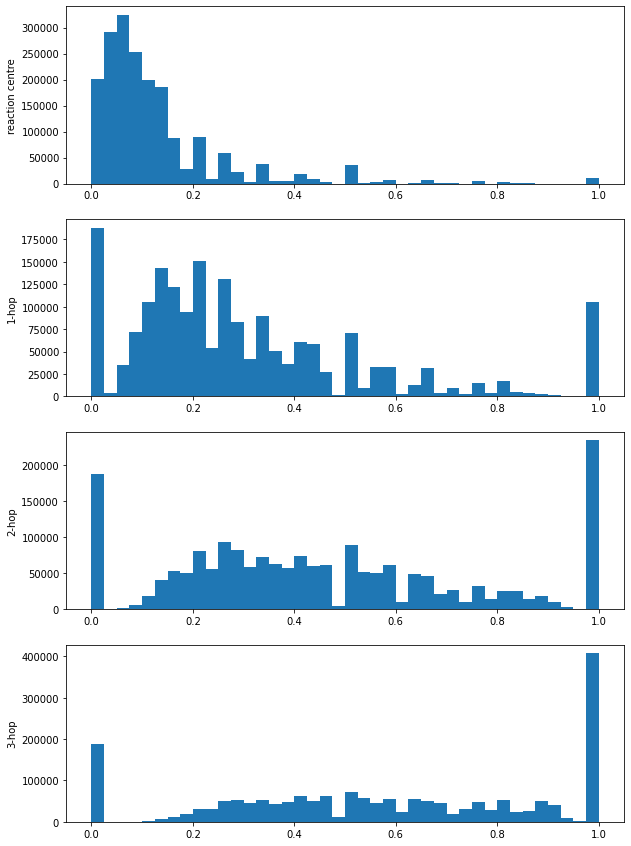

In [129]:
plt.rcParams["figure.figsize"] = (10, 15)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
ax1.hist(reaction_ratio, bins = 40)
ax1.set_ylabel("reaction centre")
ax2.hist(one_hop_r, bins = 40)
ax2.set_ylabel("1-hop")
ax3.hist(two_hop_r, bins = 40)
ax3.set_ylabel("2-hop")
ax4.hist(three_hop_r, bins = 40)
ax4.set_ylabel("3-hop")
plt.show()